Suppose we have some quantity $y$, that is defined as a function of other quantities $x_i$:
$$y=f\left(x_{1},x_{2},x_{3},\cdots\right)$$

Each $x_i$ has an associated uncertainty, $\sigma_{x_{i}}$. What's the uncertainty on $y$? It's

$$ \sigma_{y}^{2}=\sum_{i}\left(\frac{\partial f}{\partial x_{i}}\right)^{2}\sigma_{x_{i}}^{2} $$

(where does this come from? what are the assumption?)

Let's take a concrete example: 

$$ {\rm M}_{G}=G+5\log\left(\frac{\varpi}{{\rm mas}}\right)-10 $$

In [45]:
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

G = 17
parallax = 0.1
flux_over_error = 100
parallax_over_error = 5

Mg = G + 5*np.log10(parallax) - 10

G_err = 2.5/np.log(10)/flux_over_error
Mg_err = np.sqrt(G_err**2 + (5/(parallax_over_error *np.log(10)))**2)
print(f'G_err: {G_err}, Mg_err: {Mg_err}')

G_err: 0.010857362047581294, Mg_err: 0.4344301777296855


In [46]:
# let's test this

N = 10000

# generate array of possible "true" parallaxes
sigma_parallax = parallax/parallax_over_error
parallaxes = parallax + sigma_parallax*np.random.randn(N)

# generate array of possible "true" fluxes and magnitudes
F = 10**(-G/2.5)
sigma_F = F/flux_over_error
Fs = F + sigma_F*np.random.randn(N)
Gs = -2.5*np.log10(Fs)

Mgs = Gs + 5*np.log10(parallaxes) - 10

Text(0, 0.5, '$P(\\rm M_{G})$')

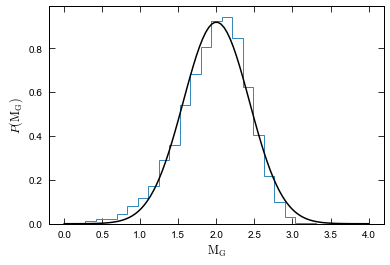

In [51]:
plt.hist(Mgs, bins = np.linspace(0, 4, 30), histtype = 'step', density=True, lw=1)

x = np.linspace(0,  4, 100)
y = 1/np.sqrt(2*np.pi*Mg_err**2)*np.exp(-(x - Mg)**2/(2*Mg_err**2))
plt.plot(x, y, 'k')
plt.xlabel(r'$\rm M_{G}$')
plt.ylabel(r'$P(\rm M_{G})$')